# Project: Movie Recommandation System

In [51]:
# import necessary packages/liraries 
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [52]:
# extract the dataset
df = pd.read_csv('top10K-TMDB-movies.csv')
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [53]:
df.shape

(10000, 9)

In [54]:
df.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [56]:
df['overview'].head()

0    Framed in the 1940s for the double murder of h...
1    Raj is a rich, carefree, happy-go-lucky second...
2    Spanning the years 1945 to 1955, a chronicle o...
3    The true story of how businessman Oskar Schind...
4    In the continuing saga of the Corleone crime f...
Name: overview, dtype: object

In [57]:
df['original_language'].unique()

array(['en', 'hi', 'es', 'ja', 'ko', 'it', 'pt', 'ru', 'zh', 'fr', 'tr',
       'sv', 'ar', 'de', 'bn', 'cn', 'da', 'nl', 'th', 'fa', 'hu', 'pl',
       'sh', 'sr', 'et', 'id', 'no', 'cs', 'te', 'ro', 'bs', 'el', 'fi',
       'is', 'ml', 'la', 'af', 'uk', 'eu', 'nb', 'he', 'ab', 'xx'],
      dtype=object)

In [58]:
df['genre'].nunique()

2123

## Cleaning data 

In [59]:
df.isna().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [60]:
df = df.dropna()

In [61]:
df.shape

(9985, 9)

<Axes: >

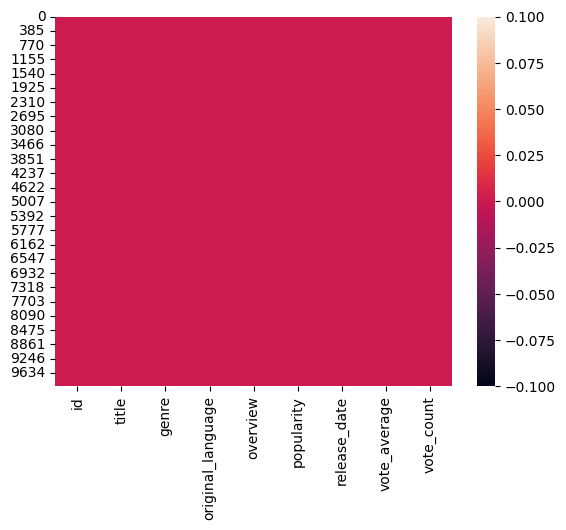

In [62]:
# check the missing values
sns.heatmap(df.isna())

In [63]:
df.duplicated().any()

False

In [ ]:
df.drop_duplicates

In [64]:
df.describe()

,id,popularity,vote_average,vote_count
count,9985.000000,9985.000000,9985.000000,9985.000000
mean,161307.213821,34.741494,6.622744,1549.249775
std,211496.747410,211.840052,0.765225,2649.809602
min,5.000000,0.600000,4.600000,200.000000
25%,10122.000000,9.169000,6.100000,315.000000
50%,29702.000000,13.652000,6.600000,585.000000
75%,310137.000000,25.687000,7.200000,1462.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [65]:
df.describe(include=[object])

,title,genre,original_language,overview,release_date
count,9985,9985,9985,9985,9985
unique,9646,2123,43,9983,6107
top,Beauty and the Beast,Comedy,en,"""Loro"", in two parts, is a period movie that c...",2017-10-20
freq,4,734,7809,2,9


In [66]:
df_corr = df[['id','popularity','vote_average','vote_count']]

In [67]:
df_corr.corr()

,id,popularity,vote_average,vote_count
id,1.000000,0.120664,-0.005570,-0.066332
popularity,0.120664,1.000000,0.063421,0.092759
vote_average,-0.005570,0.063421,1.000000,0.267340
vote_count,-0.066332,0.092759,0.267340,1.000000


<Axes: >

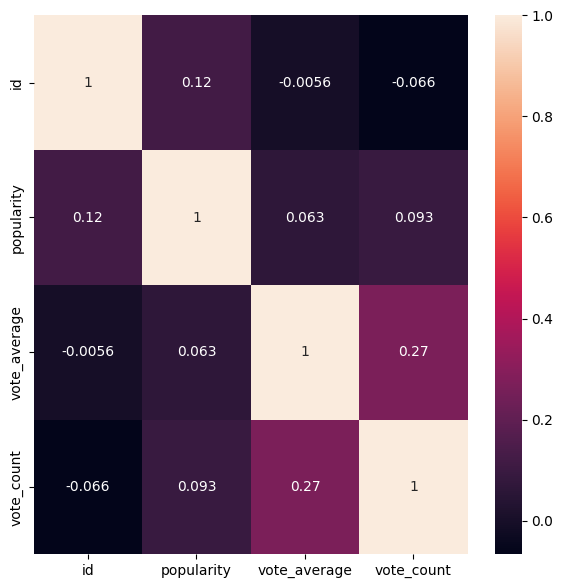

In [68]:
corr = df.select_dtypes(include=['float','int']).corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True)


C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\MSI\AppData\Roaming\P

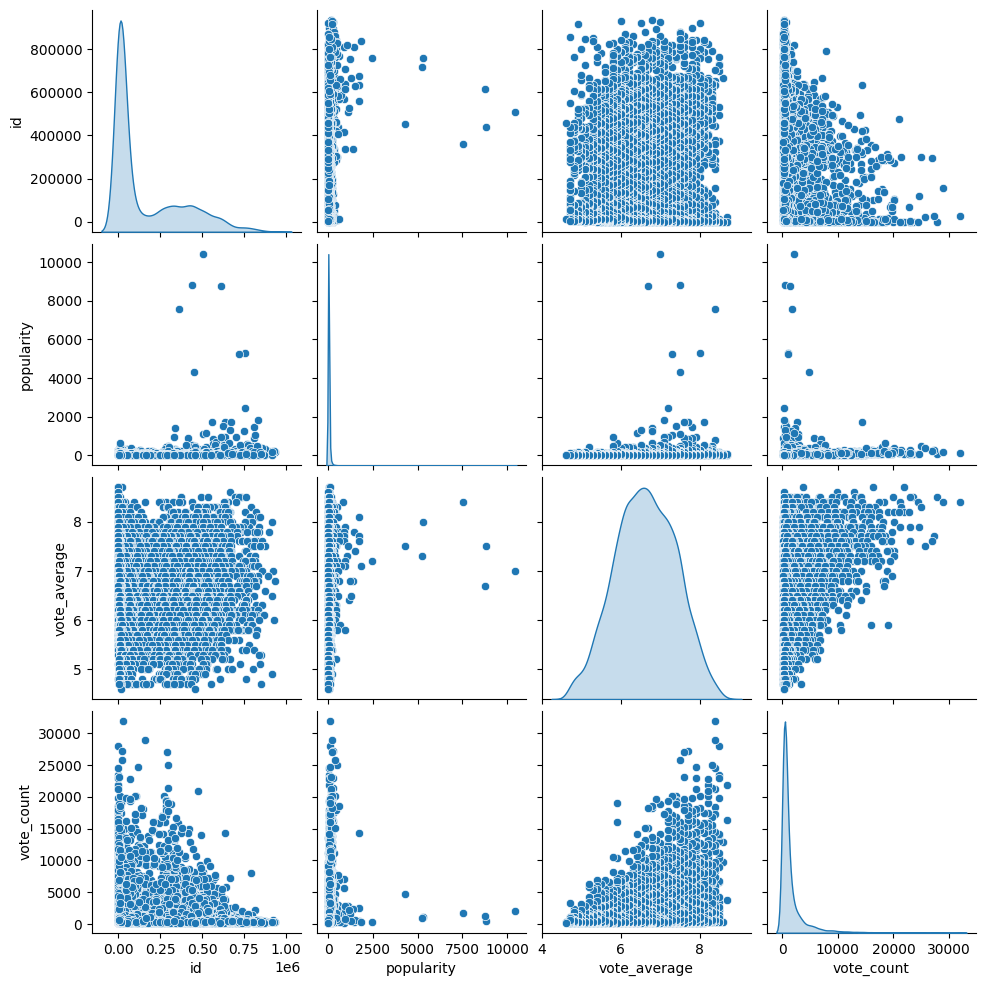

In [70]:
sns.pairplot(data=df, diag_kind="kde", palette="husl");

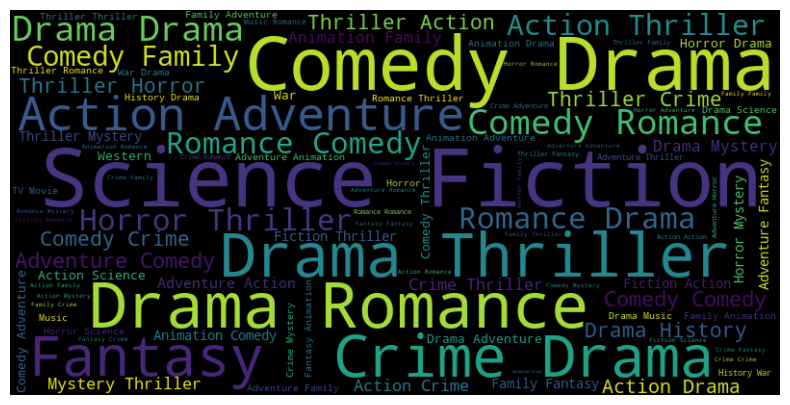

In [71]:
from wordcloud import WordCloud
# Ensure all entries in 'genre' are strings and handle NaNs
df['genre'] = df['genre'].astype(str).fillna('')

# Combine all text in the 'genre' column
text = ', '.join(df['genre'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [72]:
top10_popularity = df.nlargest(10,'popularity')[['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count']].set_index('title')
# top10_popularity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


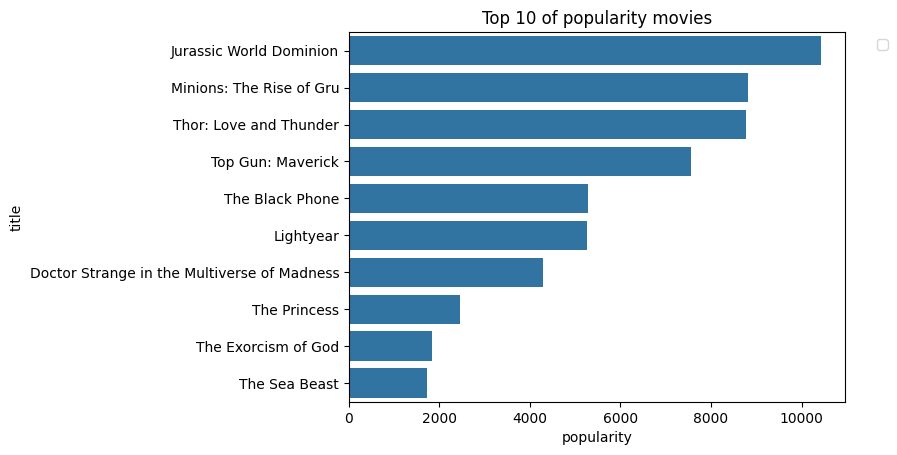

In [73]:
# Plot the bar chart to see the top 10 of movie was most popularity

sns.barplot(x='popularity', y=top10_popularity.index, data = top10_popularity);
# plt.figure(figsize=(15,10))
plt.legend(bbox_to_anchor=(1.05,1), loc = 2);
plt.title("Top 10 of popularity movies");
plt.show();

In [74]:
df = df[['id','title','overview','genre'  ]]

In [75]:
df['tag'] = df['overview'] + df['genre']
df.head(1)

,id,title,overview,genre,tag
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...


In [76]:
df_up = df.drop(columns=['overview', 'genre'])
df_up.head(1)

,id,title,tag
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...


In [77]:
df_up.shape

(9985, 3)

In [78]:
df_up.columns

Index(['id', 'title', 'tag'], dtype='object')

In [79]:
# convert the collect of text to numerical

from sklearn.feature_extraction.text import CountVectorizer

# create a coutvector instance class
cv = CountVectorizer(max_features=9985, stop_words='english')

# fit and transform
vector =  cv.fit_transform(df_up['tag'].values.astype('U')).toarray()


In [80]:
x = cv.transform(df_up['tag'])
x.shape

(9985, 9985)

In [81]:
vector.shape

(9985, 9985)

In [82]:
print(cv.get_feature_names_out())

['000' '007' '10' ... 'zone' 'zones' 'zoo']


In [83]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [84]:
# cosinr_similarity
from sklearn.metrics.pairwise import cosine_similarity

simmilarity = cosine_similarity(vector)


In [85]:
simmilarity

array([[1.        , 0.05634362, 0.13041013, ..., 0.07559289, 0.11065667,
        0.06900656],
       [0.05634362, 1.        , 0.07715167, ..., 0.        , 0.03636965,
        0.        ],
       [0.13041013, 0.07715167, 1.        , ..., 0.02300219, 0.0673435 ,
        0.09449112],
       ...,
       [0.07559289, 0.        , 0.02300219, ..., 1.        , 0.03253   ,
        0.03042903],
       [0.11065667, 0.03636965, 0.0673435 , ..., 0.03253   , 1.        ,
        0.04454354],
       [0.06900656, 0.        , 0.09449112, ..., 0.03042903, 0.04454354,
        1.        ]])

In [86]:
df_up['title'].iloc[2]

'The Godfather'

In [87]:
df_up['title'].iloc[100]

'The Lion King'

In [88]:
df_up[df_up['title'] == "The Godfather"]

,id,title,tag
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."


In [89]:
df_up[df_up['title'] == "The Godfather"].index[0]

2

In [90]:
dis = sorted(list(enumerate(simmilarity[2])), reverse=True,  key=lambda vector:vector[1])
for i in dis[:10]:
  print(i)

(2, 1.0000000000000004)
(4, 0.4763305116224667)
(7416, 0.35634832254989923)
(153, 0.33946736991660215)
(2624, 0.32732683535398854)
(9512, 0.31497039417435607)
(2412, 0.3118047822311618)
(330, 0.30860669992418377)
(5008, 0.30304576336566325)
(779, 0.29957234475763905)


In [91]:
distance = sorted(list(enumerate(simmilarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
  print(df_up.iloc[i[0]].title)

The Godfather
The Godfather: Part II
Blood Ties
Joker
Bomb City


In [92]:
def recommander(movies):
  index = df_up[df_up['title'] == movies].index[0]
  distance = sorted(list(enumerate(simmilarity[index])), reverse=True, key=lambda vector:vector[1])
  for i in distance[0:5]:
    print(df_up.iloc[i[0]].title)

In [93]:
recommander('The Lion King')

The Lion King
Bambi II
Hamlet
Bambi
The Cat Returns


In [94]:
#
import pickle

In [95]:
pickle.dump(df_up, open('movie_list.pkl', 'wb'))

In [96]:
pickle.dump(df, open('df.pkl','wb'))

In [97]:
# pickle.load(open('df.pkl','rb'))

In [98]:
#pickle.load(open('simmilarity.pkl','rb'))

In [99]:
pickle.dump(simmilarity,open('simmilarity.pkl', 'wb'))

In [100]:
pickle.load(open('movie_list.pkl','rb'))

,id,title,tag
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...
